In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

## 1. Use Twitter API to stream and store tweets

In [4]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# 37.781157,-122.39872 is the lat,lng for SF
hilary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [5]:
the_donald_tweets[0].text

u'Perhaps @JasonMillerinDC forgot #DonaldTrump questioned if his former boss #TedCruz was really an American\u2026 https://t.co/E6tFqTi52J'

In [6]:
hilary_tweets[0].text

u'Too funny!! The college dropout making fun of the smart one home preparing for debate? When will these jokers grow\u2026 https://t.co/RtbKVKDvRp'

In [7]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].coordinates

2016-10-06 18:07:08
Perhaps @JasonMillerinDC forgot #DonaldTrump questioned if his former boss #TedCruz was really an American… https://t.co/E6tFqTi52J
0
False
en
None
0
False
None


In [9]:
# modify the tweets to make a nice dictionary
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
hilary_tweets = parse_status_objects(hilary_tweets)
the_donald_tweets = parse_status_objects(the_donald_tweets)

In [10]:
print the_donald_tweets[0]
print hilary_tweets[0]

[datetime.datetime(2016, 10, 6, 18, 7, 8), u'Perhaps @JasonMillerinDC forgot #DonaldTrump questioned if his former boss #TedCruz was really an American\u2026 https://t.co/E6tFqTi52J', 0, False, u'en', None, 0, False, None]
[datetime.datetime(2016, 10, 6, 18, 2, 40), u'Too funny!! The college dropout making fun of the smart one home preparing for debate? When will these jokers grow\u2026 https://t.co/RtbKVKDvRp', 2, False, u'en', None, 0, False, None]


In [11]:
len(the_donald_tweets)

316

In [12]:
len(hilary_tweets)

273

## 2. Create a dataframe that combines all of the tweets from each candidate

In [13]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count, favorited, language, geocode, retweet count, retweeted, coordinates

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
feature_cols =['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet_count', 
               'retweeted', 'coordinates']
tweets = pd.DataFrame(the_donald_tweets + hilary_tweets, columns=feature_cols)
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates
0,2016-10-06 18:07:08,Perhaps @JasonMillerinDC forgot #DonaldTrump q...,0,False,en,None,0,False,None
1,2016-10-06 16:59:06,RT @CartoonGirl35: 🔥 #DonaldTrump Pants on 🔥...,0,False,en,None,1,False,None
2,2016-10-06 16:49:53,🔥 #DonaldTrump Pants on 🔥\n\n🔥 #DonaldTrump...,1,False,en,None,1,False,None
3,2016-10-06 16:48:36,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None
4,2016-10-06 16:47:49,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None


In [16]:
tweets.shape

(589, 9)

## 3. Create a function to take in a string and output the textblob sentiment of that string

In [17]:
# 3 Create a function to take in a string and output the textblob sentiment of that string

In [18]:
from textblob import TextBlob

In [19]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

## 4. Add a column to your data frame called 'sentiment'

In [20]:
# 4 Add a column to your data frame called 'sentiment'
# which holds the sentiment of that tweet (hint: use the function from #3)

In [21]:
tweets['sentiment'] = tweets.text.apply(detect_sentiment)

In [22]:
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment
0,2016-10-06 18:07:08,Perhaps @JasonMillerinDC forgot #DonaldTrump q...,0,False,en,None,0,False,None,0.1
1,2016-10-06 16:59:06,RT @CartoonGirl35: 🔥 #DonaldTrump Pants on 🔥...,0,False,en,None,1,False,None,0.0
2,2016-10-06 16:49:53,🔥 #DonaldTrump Pants on 🔥\n\n🔥 #DonaldTrump...,1,False,en,None,1,False,None,0.0
3,2016-10-06 16:48:36,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None,0.0
4,2016-10-06 16:47:49,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None,0.0


## 5. create a word count column

In [23]:
# 5 create a word count column, which holds the number of words in the text column

In [24]:
tweets['word_count'] = tweets.text.str.split().apply(len)
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,word_count
0,2016-10-06 18:07:08,Perhaps @JasonMillerinDC forgot #DonaldTrump q...,0,False,en,None,0,False,None,0.1,15
1,2016-10-06 16:59:06,RT @CartoonGirl35: 🔥 #DonaldTrump Pants on 🔥...,0,False,en,None,1,False,None,0.0,19
2,2016-10-06 16:49:53,🔥 #DonaldTrump Pants on 🔥\n\n🔥 #DonaldTrump...,1,False,en,None,1,False,None,0.0,17
3,2016-10-06 16:48:36,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None,0.0,7
4,2016-10-06 16:47:49,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None,0.0,7


In [25]:
tweets.text[0]

u'Perhaps @JasonMillerinDC forgot #DonaldTrump questioned if his former boss #TedCruz was really an American\u2026 https://t.co/E6tFqTi52J'

In [26]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
# Don't add count vectorizer result to the original dataframe

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# use CountVectorizer to create document-term matrices
vect = CountVectorizer()
tweets_dtm = vect.fit_transform(tweets.text)
tweets_dtm.shape

(589, 2314)

In [29]:
vect.get_feature_names()

[u'000',
 u'00pm',
 u'01qb',
 u'02',
 u'03wzsojv3j',
 u'0bgeposlod',
 u'0hw5tovjea',
 u'0nzbprev7f',
 u'10',
 u'10e4vfkckg',
 u'11',
 u'14',
 u'15',
 u'16',
 u'16ghqfvzee',
 u'1776',
 u'183',
 u'1984',
 u'1995',
 u'1a',
 u'1bvkj0nsuj',
 u'1nvtaz0plu',
 u'1sided',
 u'1st',
 u'1tlrpbirno',
 u'1wmlo85vn7',
 u'1ye8sqegbd',
 u'200',
 u'2000',
 u'2007',
 u'2016',
 u'2016election',
 u'2020',
 u'24',
 u'250',
 u'27',
 u'2grpjlskim',
 u'2nt62z5kqo',
 u'2olhmljwcw',
 u'30',
 u'30yrs',
 u'32',
 u'36',
 u'39fmvsrsrp',
 u'3o9d696kkd',
 u'3qspwsqrdr',
 u'3qsxne2hke',
 u'3tn9jrkfd3',
 u'3vaipnhojz',
 u'4000',
 u'410lulu',
 u'42',
 u'43',
 u'43ilo4q',
 u'43ilo4qroy',
 u'44',
 u'45thpresidentofamazingamerica',
 u'4au8pagkgx',
 u'4b7tt5cf3c',
 u'4bxyfcq4cj',
 u'4ginq0wwur',
 u'4rs1lyncow',
 u'4uks0ihprv',
 u'500',
 u'53xz85e6vw',
 u'55',
 u'589bh0xhnh',
 u'5dgwvwrcwk',
 u'5kpp8cmaxz',
 u'5oklkan2uf',
 u'5yig6rpepo',
 u'61yn2isi0q',
 u'63',
 u'63i2g1mwtb',
 u'66zi0rhlvl',
 u'6bmgrf8drn',
 u'6hf5qlb7sn',


In [30]:
dtm_df = pd.DataFrame(tweets_dtm.toarray(), columns=vect.get_feature_names())
dtm_df.shape

(589, 2314)

In [31]:
dtm_df.head()

,000,00pm,01qb,02,03wzsojv3j,0bgeposlod,0hw5tovjea,0nzbprev7f,10,10e4vfkckg,...,zenpopart,zie2y6m6dk,zmfe1wsfn1,zn2vhybrka,zones,zosm0x8kta,zqtrvp41bc,zspucvpdss,ztrn891uxr,zxjs7nlnsy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
tweets_dtm[0]

<1x2314 sparse matrix of type '<type 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [33]:
# concatinate it to your main dataframe
tweets_with_dtm = pd.concat([tweets, dtm_df], axis=1)
tweets_with_dtm.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,...,zenpopart,zie2y6m6dk,zmfe1wsfn1,zn2vhybrka,zones,zosm0x8kta,zqtrvp41bc,zspucvpdss,ztrn891uxr,zxjs7nlnsy
0,2016-10-06 18:07:08,Perhaps @JasonMillerinDC forgot #DonaldTrump q...,0,False,en,None,0,False,None,0.1,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-06 16:59:06,RT @CartoonGirl35: 🔥 #DonaldTrump Pants on 🔥...,0,False,en,None,1,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-06 16:49:53,🔥 #DonaldTrump Pants on 🔥\n\n🔥 #DonaldTrump...,1,False,en,None,1,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-06 16:48:36,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-06 16:47:49,🔥 #DonaldTrump Pante on 🔥\n\n@cspanwj https:...,1,False,en,None,0,False,None,0.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tweets_with_dtm.shape

(589, 2325)

## 6. Use kmean to create clusters for the dataframe

In [35]:
# 6 Use kmean to create clusters for the dataframe (choose an optimal k)
# Don't add clusters to the original dataframe

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [38]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(dtm_df)
    scores.append(metrics.silhouette_score(dtm_df, km.labels_))

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

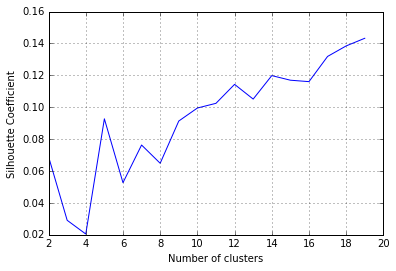

In [40]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

k =4 (This changes a little every time I run it.)

## 7. Explore the clusters

In [ ]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown

The 1st time I ran this the silhouette coefficient is not showing a dip to indicate an optimal k.

Am I using the right dataframe? More clusters?

## 8. Create a column called 'democrat'

In [41]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for hilary and 0 for donald trump
# Make a boxplot of sentiment for each candidate by the "democrat" column

In [42]:
hilary_tweets_df = pd.DataFrame(hilary_tweets, columns=feature_cols)
hilary_tweets_df['sentiment'] = hilary_tweets_df.text.apply(detect_sentiment)
hilary_tweets_df['word_count'] = hilary_tweets_df.text.str.split().apply(len)
hilary_tweets_df['democrat'] = 1

donald_tweets_df = pd.DataFrame(the_donald_tweets, columns=feature_cols)
donald_tweets_df['sentiment'] = donald_tweets_df.text.apply(detect_sentiment)
donald_tweets_df['word_count'] = donald_tweets_df.text.str.split().apply(len)
donald_tweets_df['democrat'] = 0

tweets = pd.concat([hilary_tweets_df, donald_tweets_df])
tweets.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,word_count,democrat
0,2016-10-06 18:02:40,Too funny!! The college dropout making fun of ...,2,False,en,None,0,False,None,0.301637,21,1
1,2016-10-06 17:50:13,"Sean Hannity should promote party growth, not ...",0,False,en,None,0,False,None,0.285714,20,1
2,2016-10-06 17:44:28,Is #TrumpZERO running 4 President or a hybrid ...,0,False,en,None,0,False,None,0.000000,19,1
3,2016-10-06 17:43:41,'The Atlantic' Editors Endorse Hillary Clinton...,0,False,en,None,0,False,None,0.000000,10,1
4,2016-10-06 17:40:23,keeping my presidential vote confidential. #Im...,0,False,en,None,0,False,None,0.000000,6,1


In [43]:
tweets.tail()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,word_count,democrat
311,2016-10-05 02:18:18,Kaine is an absolute ASS! I mean talk about lo...,3,False,en,None,0,False,None,0.034375,20,0
312,2016-10-05 02:00:50,I support Team Trump! Download the official ap...,0,False,en,None,0,False,None,0.000000,12,0
313,2016-10-05 01:36:33,"I can not believe his, Kaine's, ineptitude, im...",1,False,en,None,0,False,None,0.125000,13,0
314,2016-10-05 01:28:29,"@HillaryClinton You're an idiot, Hill. Go back...",3,False,en,None,0,False,None,-0.400000,13,0
315,2016-10-05 00:40:01,@GovPenceIN Governor good luck tonight! Please...,0,False,en,None,0,False,None,0.295833,14,0


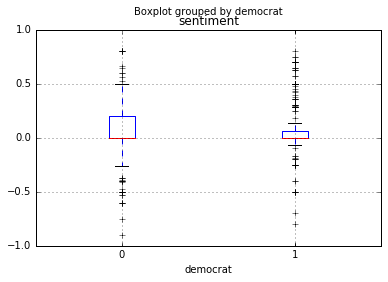

In [44]:
# Make a boxplot of sentiment for each candidate by the "democrat" column
import matplotlib.pyplot as plt
%matplotlib inline

tweets.boxplot(column='sentiment', by='democrat')



## 9. Estimate classification models using knn and logistic regession.

In [44]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# The cateogrical response here is predict democrat or republican
# Your features can EITHER be your countvectorizer document term matrix OR 
# data from the original dataframe (sentiment, word count, etc)

In [45]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier()
logreg = LogisticRegression()

#feature_cols = tweets.columns[:-1]
feature_cols = ['sentiment', 'word_count']
X = tweets[feature_cols]
y = tweets.democrat



In [46]:
X.head()

,sentiment,word_count
0,0.301637,21
1,0.285714,20
2,0.000000,19
3,0.000000,10
4,0.000000,6


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: democrat, dtype: int64

In [48]:
knn.fit(X, y)
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 10. Initialize a classification model (for both knn and logistic)

In [ ]:
# 10 Initialize a classification model (for both knn and logistic)
# This is separate from step 9 because I will eventually want a 
# confusion matrix and we can't do that via cros validation

## 11. Split and Train

In [ ]:
# 11 Split your data into training and testing tests and then
# train your classification model  (for both knn and logistic)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 12. Predict on your test features and targets

In [ ]:
# 12 Predict on your test features and targets (for both knn and logistic)

In [50]:
from sklearn import metrics

preds_knn = knn.predict(X)
preds_logreg = logreg.predict(X)

## 13. output your accuracy

In [ ]:
# 13 output your accuracy (for both knn and logistic)

In [51]:
# accuracy = (TP + TN)/total
print metrics.classification_report(y, preds_knn)

             precision    recall  f1-score   support

          0       0.70      0.73      0.71       316
          1       0.67      0.64      0.66       273

avg / total       0.69      0.69      0.69       589



In [52]:
print metrics.classification_report(y, preds_logreg)

             precision    recall  f1-score   support

          0       0.57      0.73      0.64       316
          1       0.54      0.37      0.44       273

avg / total       0.56      0.56      0.55       589



## 14. Create a confusion matrix

In [ ]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
# What is the sensitivity and specificity?

In [53]:
from sklearn import metrics

#preds = knn.predict(X)
print metrics.confusion_matrix(y, preds_knn)

#preds = logreg.predict(X)
print metrics.confusion_matrix(y, preds_logreg)

[[230  86]
 [ 98 175]]
[[230  86]
 [173 100]]


In [ ]:
# Top Left: True Negatives 
# Top Right False Negatives 
# Bottom Left: False Negatives 
# Bottom Right: True Positives 

Sensitivity = TP/actual yes = TPR

Specificity = 

## 15. Who is the easiest candidate to predict?

In [ ]:
# 15 Who is the easiest candidate to predict? Why do you think? 
# Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)

## Bonus

In [ ]:
# 16 BONUS: make a pipeline with the first step being a feature union of countvectorizer
# and tfidfvectorizer and no other features and our second step is
# a ML model (your choice) predict our binary response


In [16]:
# 17: BONUS: grid search the model in step 16 to obtain the best features (up to you)

In [ ]:
# 18: SUPER BONUS: make a custom transformer that extracts sentiment and word count
# make a pipeline that combines countvec, tfidfvec and your custom transformer
# and try to get the possible accuracy for predicting whether or not the person is talking
# about democrats or republicans